<h1>Математические основы машинного обучения III (часть 1)</h1>


<h2>Итоговый проект "Анализ временных рядов"

<h3>Задание:</h3>

<p>Цель проекта: провести анализ выбранного временного ряда в соответствии с примерами из практических материалов курса.
<p>Ознакомьтесь с содержанием демонстрационных блокнотов, в которых реализованы методы визуализации, предсказания и классификации временных рядов
<p>Примеры тем: скачайте уже знакомый вам набор данных для анализа временных рядов для открытых энергетических систем: https://data.open-power-system-data.org/time_series/2020-10-06. Выберите 1 набор данных (столбец) из представленных аналогично тому, как это было сделано в примерах. Допустим выбор любого столбца, кроме рассмотренного в примерах (в примерах рассмотрена страна Германия, столбец «Общее энергопотребление», а также в первом занятии — столбец «Потребление ветряной энергии в Германии»). Могут быть выбраны и другие наборы данных. Например, набор запросов на такси.

<p>По результатам анализа ожидается отчет, включающий следующие пункты:
<ul>
<li>Результаты предварительного анализа выбранного однопеременного ВР. </li>
<li>Сравнение не менее 3-х методов предсказаний значений ВР по выбранной метрике точности и визуально. Соответственно рекомендации по выбору метода.</li>
<li>Отчет о выборе параметров модели SARIMA (можно в режиме автовыбора или ручном режиме, возможна их комбинация). Отчет также должен включать описание остаточной части предсказания.</li>
<li>Сравнение выбранных методов предсказаний и результатов работы настроенной модели SARIMA.</li>
<li>Аналогично примерам (классификация временных рядов) анализ выбранного однопеременного ряда на предмет классификации его сегментов. Задачу можно сформулировать самостоятельно, например, как синтетическую для того же набора данных, который использовался для предсказания. Можно выбрать и новый набор данных. Результатом анализа должна быть таблица не менее чем из 3-х методов, которые сравнены по точности. </li>
<li>Отчет об исследовании выбранной задачи классификации  при помощи глубоких нейронных сетей в пакете tsai. Исследование может быть проведено аналогично примеру. Результат анализа — рекомендованная архитектура нейронной сети. Архитектура должна быть сравнена с методам классификации из пункта выше.</li>
<li>Отчет о выявлении аномалий во временном ряду. Может быть выбран ВР, использованный ранее. Отчет должен включать результаты анализа не менее чем 3-х методов аналогичных тем, что в примерах. Отчет может быть произведен в текстовом виде, например, как наиболее частые типы аномалий или гипотезы о причинах их появления. Также в отчет можно включить рекомендации по выбору и настройке методов выявления аномалий.</li>
    </ul>

<h2>1. Предварительный анализ временного ряда</h2>

In [58]:
# импорт необходимых библиотек

import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.dates as mdates #Date Parser

import seaborn as sns
sns.set_style('white')
sns.set(rc={'figure.figsize':(11, 4)})

Для анализа выбран временной ряд https://github.com/numenta/NAB/blob/master/data/realTweets/Twitter_volume_AMZN.csv, в котором указано количество упоминаний компании "Амазон" в твиттер с пятиминутным интервалом.

In [59]:
# Загрузка данных (https://github.com/numenta/NAB/blob/master/data/realTweets/Twitter_volume_AMZN.csv)

data = pd.read_csv('Twitter_volume_AMZN.csv', index_col='timestamp', parse_dates=True)
data.head()

,value
timestamp,
2015-02-26 21:42:53,57
2015-02-26 21:47:53,43
2015-02-26 21:52:53,55
2015-02-26 21:57:53,64
2015-02-26 22:02:53,93


In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15831 entries, 2015-02-26 21:42:53 to 2015-04-22 20:52:53
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   value   15831 non-null  int64
dtypes: int64(1)
memory usage: 247.4 KB


In [61]:
data.describe()

,value
count,15831.000000
mean,53.298465
std,30.553147
min,0.000000
25%,36.000000
50%,50.000000
75%,65.000000
max,1673.000000


Выведем график временного ряда

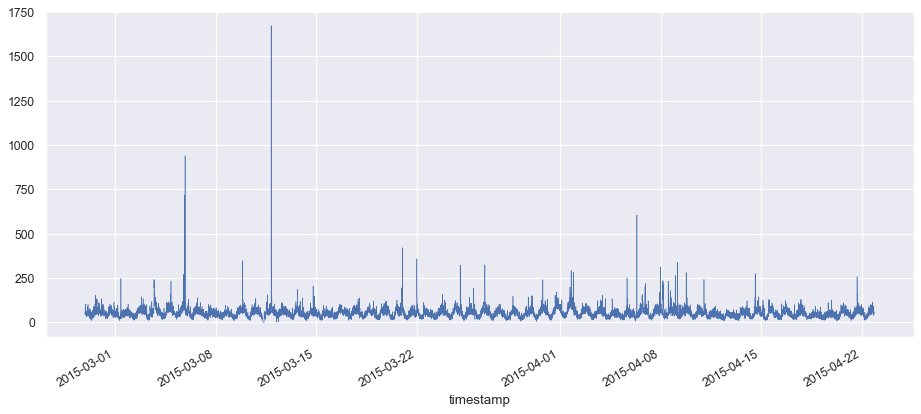

In [62]:
figure(figsize=(14, 6), dpi=80)
data['value'].plot(linewidth=0.5);

In [63]:
print(data.index.min(), data.index.max())

2015-02-26 21:42:53 2015-04-22 20:52:53


In [64]:
data['date'] = pd.to_datetime(data.index).date
data['h'] = pd.to_datetime(data.index).hour

In [65]:
data.head()

,value,date,h
timestamp,,,
2015-02-26 21:42:53,57,2015-02-26,21
2015-02-26 21:47:53,43,2015-02-26,21
2015-02-26 21:52:53,55,2015-02-26,21
2015-02-26 21:57:53,64,2015-02-26,21
2015-02-26 22:02:53,93,2015-02-26,22


In [66]:
df = data.groupby('date').sum()

In [67]:
df.drop(df.tail(1).index,inplace=True)
df.drop(df.head(1).index,inplace=True)

 Сторим график суммарных показателей за сутки (за весь период)

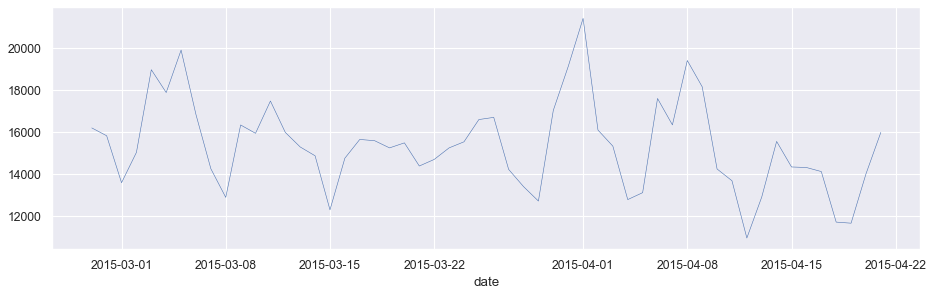

In [68]:
figure(figsize=(14, 4), dpi=80)
df['value'].plot(linewidth=0.5);
plt.show()

Строим график почасовых суммарных показателей (за весь период)

In [103]:
# Формируем датасет с почасовой статистикой
df_h = data.groupby(pd.Grouper(freq='1h')).sum()
df_h.drop(df_h.tail(1).index,inplace=True)
df_h.drop(df_h.head(1).index,inplace=True)
df_h.sample(6)

,value,h
timestamp,,
2015-04-05 08:00:00,324,96
2015-03-20 20:00:00,837,240
2015-02-27 04:00:00,526,48
2015-03-14 19:00:00,973,228
2015-04-20 11:00:00,468,132
2015-03-03 01:00:00,733,12


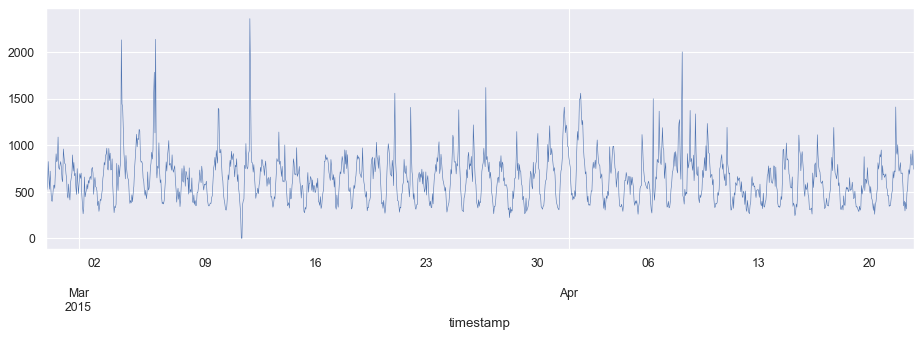

In [70]:
figure(figsize=(14, 4), dpi=80)
df_h['value'].plot(linewidth=0.5)
plt.show()

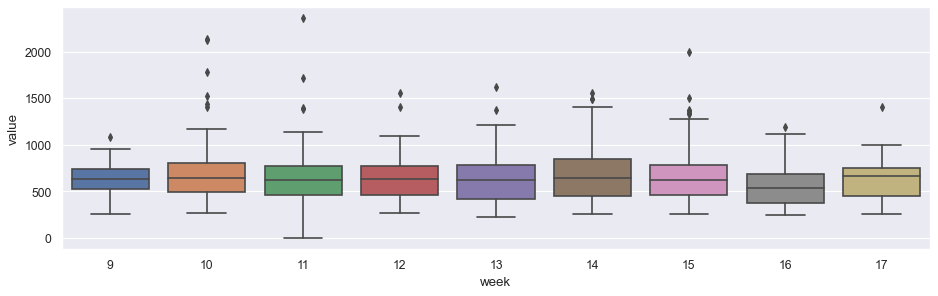

In [71]:
figure(figsize=(14, 4), dpi=80)
ax = sns.boxplot(data=df_h, x=pd.to_datetime(df_h.index).isocalendar().week, y='value')
ax.set_ylabel('value')
ax.set_xlabel('week')
plt.show()

Наложим почасовой и среднесуточный графики

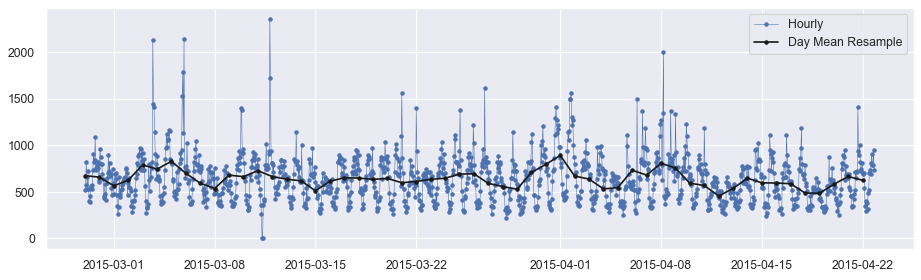

In [72]:
start, end = '2015-02-27', '2015-04-22'

fig, ax = plt.subplots(figsize=(14, 4), dpi=80)
ax.plot(df_h.loc[start:end, 'value'],marker='.', linestyle='-', linewidth=0.5, label='Hourly')
ax.plot(df_h.resample('D').mean().loc[start:end, 'value'], marker='o', 
        markersize=3, linestyle='-', label='Day Mean Resample', color='k')
ax.legend();

Выберем произвольные две недели

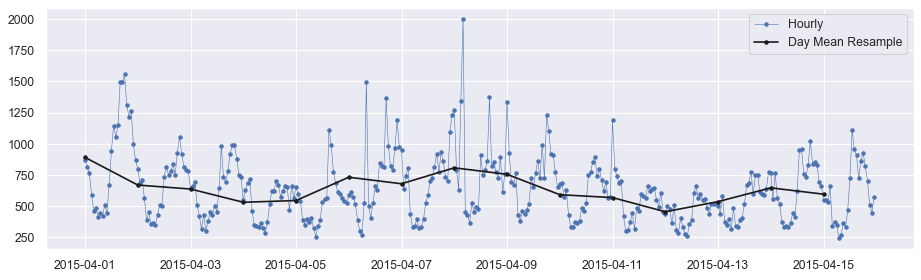

In [73]:
start, end = '2015-04-01', '2015-04-15'

fig, ax = plt.subplots(figsize=(14, 4), dpi=80)
ax.plot(df_h.loc[start:end, 'value'],marker='.', linestyle='-', linewidth=0.5, label='Hourly')
ax.plot(df_h.resample('D').mean().loc[start:end, 'value'], marker='o', markersize=3, linestyle='-', label='Day Mean Resample', color='k')
ax.legend();

Построим график средних почасовых значений за весь период

<AxesSubplot:xlabel='h'>

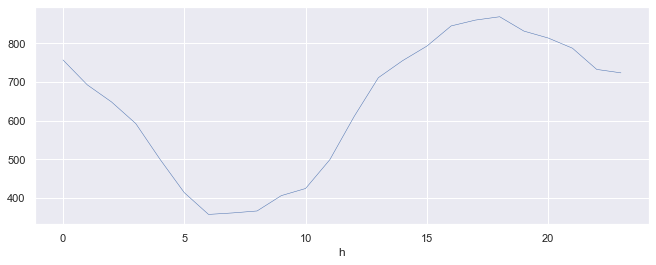

In [74]:
df_h.h = pd.to_datetime(df_h.index).hour

df_h_h = df_h.groupby('h').mean()

df_h_h['value'].plot(linewidth=0.5)

<h3>Вывод:</h3> <p>
На основании предварительного анализа временного ряда выявленно, что ряд данных имеет как суточную, так и недельную сезонность.

<h2>2. Сравнение методов предсказания временного ряда</h2>

In [75]:
# импорт необходимых библиотек

import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

import sktime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.compose import (
    EnsembleForecaster,
    MultiplexForecaster,
    TransformedTargetForecaster,
    make_reduction,
)
from sktime.forecasting.model_evaluation import evaluate
from sktime.forecasting.model_selection import (
    ExpandingWindowSplitter,
    ForecastingGridSearchCV,
    SlidingWindowSplitter,
    temporal_train_test_split,
)
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.theta import ThetaForecaster
from sktime.forecasting.trend import PolynomialTrendForecaster
from sktime.performance_metrics.forecasting import  MeanAbsolutePercentageError, MeanSquaredError
from sktime.transformations.series.detrend import Deseasonalizer, Detrender
from sktime.utils.plotting import plot_series
from sktime.forecasting.compose import TransformedTargetForecaster
from sktime.forecasting.trend import PolynomialTrendForecaster
from sktime.transformations.panel.tsfresh import TSFreshFeatureExtractor
from sktime.forecasting.fbprophet import Prophet
from sktime.forecasting.tbats import TBATS
smape = MeanAbsolutePercentageError(symmetric = True)
rmse  = MeanSquaredError(square_root=True)

from sklearn.ensemble import RandomForestRegressor

from sklearn.pipeline import make_pipeline

from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestClassifier



r2_score = lambda y_pred, y_test: 1-np.sum(np.square(y_pred - y_test))/np.sum(np.square(y_test - np.mean(y_test)))

warnings.simplefilter("ignore", FutureWarning)
%matplotlib inline

In [76]:
df_h.head()

,value,h
timestamp,,
2015-02-26 22:00:00,931,22
2015-02-26 23:00:00,568,23
2015-02-27 00:00:00,516,0
2015-02-27 01:00:00,574,1
2015-02-27 02:00:00,824,2


In [77]:
df_h.value = df_h.value.astype('float')
y = df_h.value
y

timestamp
2015-02-26 22:00:00    931.0
2015-02-26 23:00:00    568.0
2015-02-27 00:00:00    516.0
2015-02-27 01:00:00    574.0
2015-02-27 02:00:00    824.0
                       ...  
2015-04-22 15:00:00    906.0
2015-04-22 16:00:00    787.0
2015-04-22 17:00:00    785.0
2015-04-22 18:00:00    945.0
2015-04-22 19:00:00    740.0
Freq: H, Name: value, Length: 1318, dtype: float64

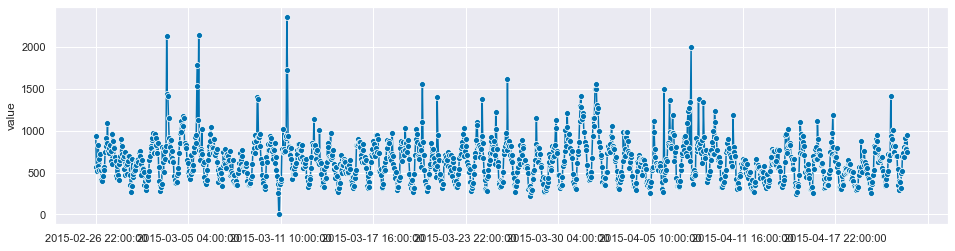

In [78]:
sktime.utils.plotting.plot_series(y);

Разделяем временной ряд на обучающую и тестовую выборки

Check splitted data size: Train: 725, Test: 593


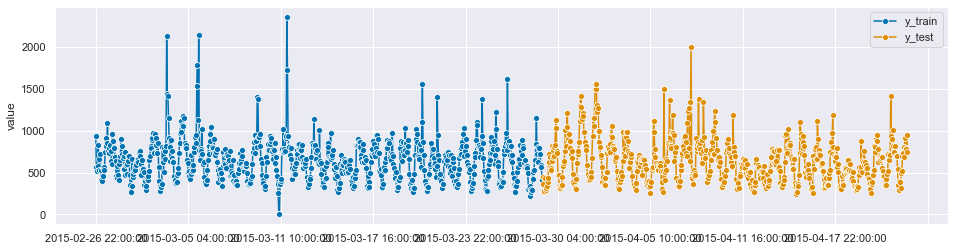

In [79]:
TEST_SIZE = int(0.45*y.size)

y_train, y_test = temporal_train_test_split(y, test_size=TEST_SIZE)

print(f'Check splitted data size: Train: {y_train.shape[0]}, Test: {y_test.shape[0]}')

sktime.utils.plotting.plot_series(y_train, y_test, labels=["y_train", "y_test"]);

In [105]:
y_train.to_csv('train.csv', index_label='timestamp') 
y_test.to_csv('test.csv', index_label='timestamp') 
df_h.to_csv('data.csv', index_label='timestamp') 

На графиках видно выбросы, носяшие случайный характер, которые могли быть вызваны какими-либо событиями локального характера от сбоев на Твиттере (когда 0 упоминаний) до резкого изменения курса акций Амазона (в максимумах). Для создания более точных моделей предсказаний избавимся от выбросов в обучающей выборке.

In [81]:
for i in range(len(y_train)):
    if y_train[i] > 1400:
        y_train[i] = 1400
    if y_train[i] < 250:
        y_train[i] = 250
        

In [82]:
# ГОРИЗОНТ
#fh = np.arange(y_test.size) + 1
fh = ForecastingHorizon(y_test.index, is_relative=False)

 Для оценки точности предсказаний воспользуемся симметричной средней процентной ошибкой (<b>symmetry Mean Average Percentage Error, sMAPE</b>) 
    $$ sMAPE =\frac{1}{H}\sum_{i=1}^{H} \frac{|y(h_i) − \hat{y}(h_i)|}{|y(h_i)| + |\hat{y}(h_i)|}
 $$

Используем для прогнозирования наивное сезонное предсказание с суточной сезонностью.

sMAPE = 0.195


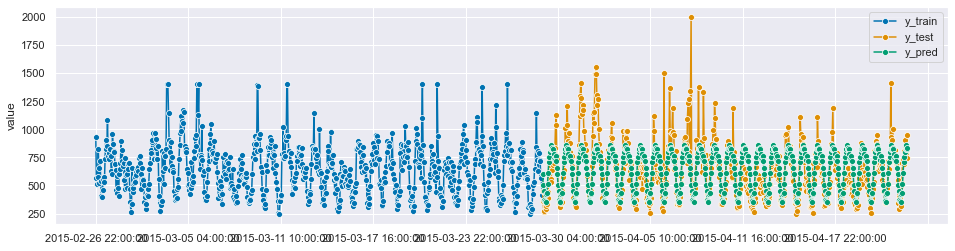

In [83]:
SEASON = 24

forecaster = NaiveForecaster(strategy="mean", sp=SEASON)
forecaster.fit(y_train)

y_pred = forecaster.predict(fh)

plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])

print(f'sMAPE = {smape(y_pred.values, y_test.values):.3f}')

sMAPE = 0.176


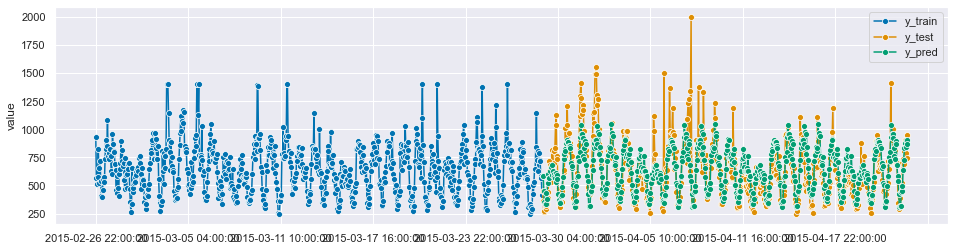

In [84]:
SEASON = 24*7

forecaster = NaiveForecaster(strategy="mean", sp=SEASON)
forecaster.fit(y_train)

y_pred = forecaster.predict(fh)

plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])

print(f'sMAPE = {smape(y_pred.values, y_test.values):.3f}')

Наивное сезонное предсказание не показало необходимой точности.

Попробуем ThetaForecaster

sMAPE = 0.180


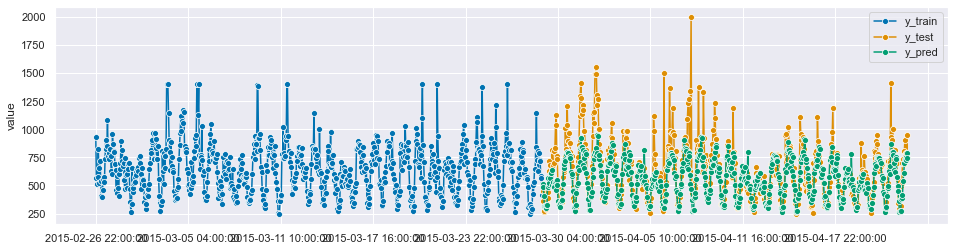

In [85]:
forecaster = ThetaForecaster(sp=SEASON)
forecaster.fit(y_train, fh=fh)
y_pred = forecaster.predict(fh)

plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
print(f'sMAPE = {smape(y_pred.values, y_test.values):.3f}')

Используем экспоненциальное сглаживание:

sMAPE = 0.176


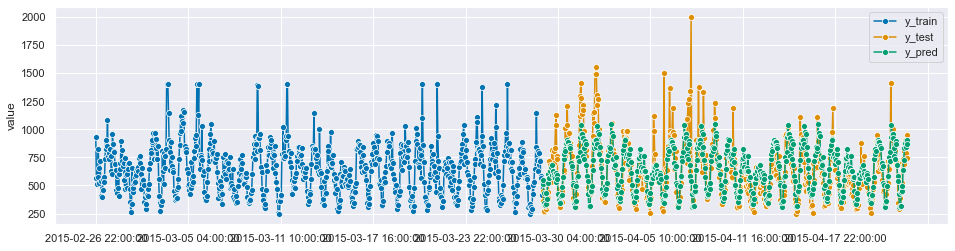

In [86]:
SEASON = 24*7

# МЕТОДЫ
forecaster = ExponentialSmoothing(trend="mul", seasonal="add", sp=SEASON, method='ls')

forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])

print(f'sMAPE = {smape(y_pred.values, y_test.values):.3f}')

Построим пайплайн с предварийтельной обработкой сезонности и последующим применением экспоненциального сглаживания.

sMAPE = 0.173


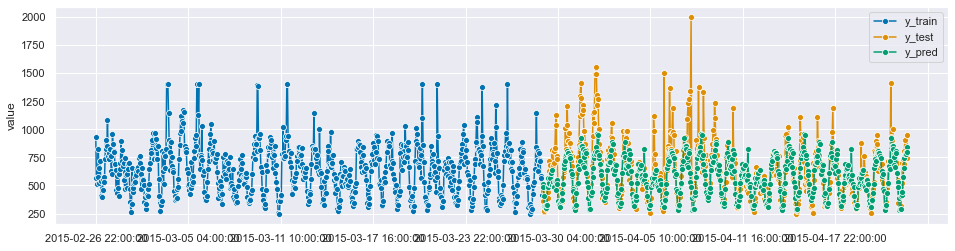

In [87]:
ses = ExponentialSmoothing()

# пайплайн
forecaster = TransformedTargetForecaster(
                steps=[
                ("deseasonalize1", Deseasonalizer(model="multiplicative", sp=24)),
                ("deseasonalize2", Deseasonalizer(model="multiplicative", sp=24*7)),
                ("forecaster", ses),
                ])
forecaster.fit(y_train)

# Предсказание
y_pred = forecaster.predict(fh)

# Результаты
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])

print(f'sMAPE = {smape(y_pred.values, y_test.values):.3f}')

<h3>Выводы:</h3>

Примененные методы в целом показали идентичную точность. Самая точная модель получилась с использованием пайплайна.

<h2>3. Применение SARIMA</h2>

In [88]:
try:
    import sktime
except:
    !pip install sktime --user
    !pip install pmdarima
    !pip install statsmodels
    !pip install prophet
import sktime
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import pmdarima as pm
from sktime.utils.plotting import plot_series
from sktime.forecasting.sarimax import SARIMAX
from sktime.forecasting.arima import AutoARIMA
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.model_selection import temporal_train_test_split

from sktime.performance_metrics.forecasting import  MeanAbsolutePercentageError, MeanSquaredError
smape = MeanAbsolutePercentageError(symmetric = True)
rmse  = MeanSquaredError(square_root=True)
r2_score = lambda y_pred, y_test: 1-np.sum(np.square(y_pred - y_test))/np.sum(np.square(y_test - np.mean(y_test)))
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

Проверяем стационарность ряда.

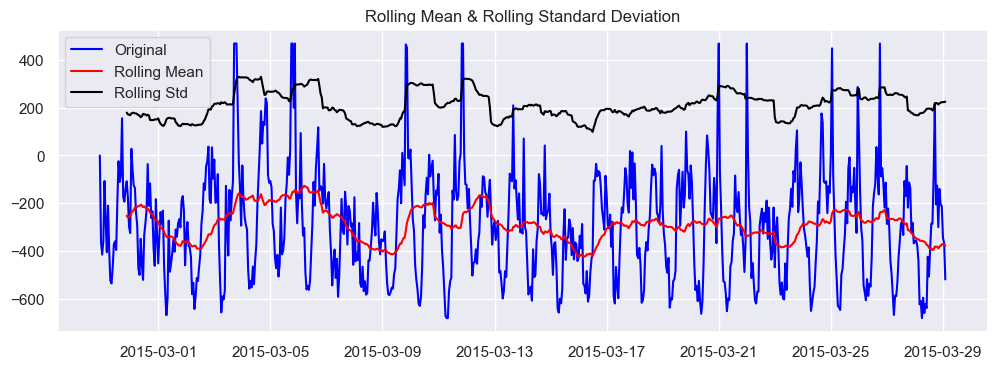

In [89]:
rolling_mean = y_train.rolling(window = 24).mean()
rolling_std  = y_train.rolling(window = 24).std()

plt.figure(figsize=(12,4), dpi=100)

plt.plot(y_train-y_train[0],      color = 'blue',  label = 'Original')
plt.plot(rolling_mean-y_train[0], color = 'red',   label = 'Rolling Mean')
plt.plot(rolling_std,             color = 'black', label = 'Rolling Std')

plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

In [90]:
P_THRESHOLD = 0.05
def check_ADF(y, p_threshold = P_THRESHOLD):
    result = adfuller(y)
    adf_value = result[0]
    p_value   = result[1]
    print('ADF Statistic: {:.4f}'.format(adf_value))
    print('p-value: {:.4f}'.format(p_value))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {:.4f}, {}'.format(key, value, 'outperformed' if adf_value>value else ""))    
    print(f'Result: The series is {"not " if p_value < p_threshold else ""}stationary')
    return result

check_ADF(y_train, p_threshold = P_THRESHOLD);

ADF Statistic: -4.2143
p-value: 0.0006
Critical Values:
	1%: -3.4397, 
	5%: -2.8657, 
	10%: -2.5690, 
Result: The series is not stationary


Ряд нестационарен. Пробуем добиться стационарности дифференцированием.

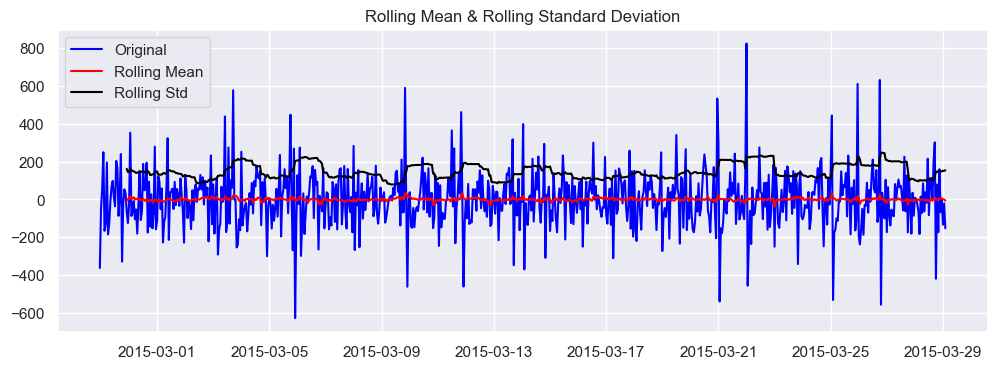

ADF Statistic: -16.6502
p-value: 0.0000
Critical Values:
	1%: -3.4397, 
	5%: -2.8657, 
	10%: -2.5690, 
Result: The series is not stationary


In [91]:
y_diff = y_train[:].diff(1).dropna()

rolling_mean = y_diff.rolling(window = 24).mean()
rolling_std  = y_diff.rolling(window = 24).std()

plt.figure(figsize=(12,4), dpi=100)

plt.plot(y_diff,       color = 'blue',  label = 'Original')
plt.plot(rolling_mean, color = 'red',   label = 'Rolling Mean')
plt.plot(rolling_std,  color = 'black', label = 'Rolling Std')

plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

result = check_ADF(y_diff)

Ряд по-прежнему нестационарен. Применим сезонное диференцирование. За цикл примем сутки (24 часа).

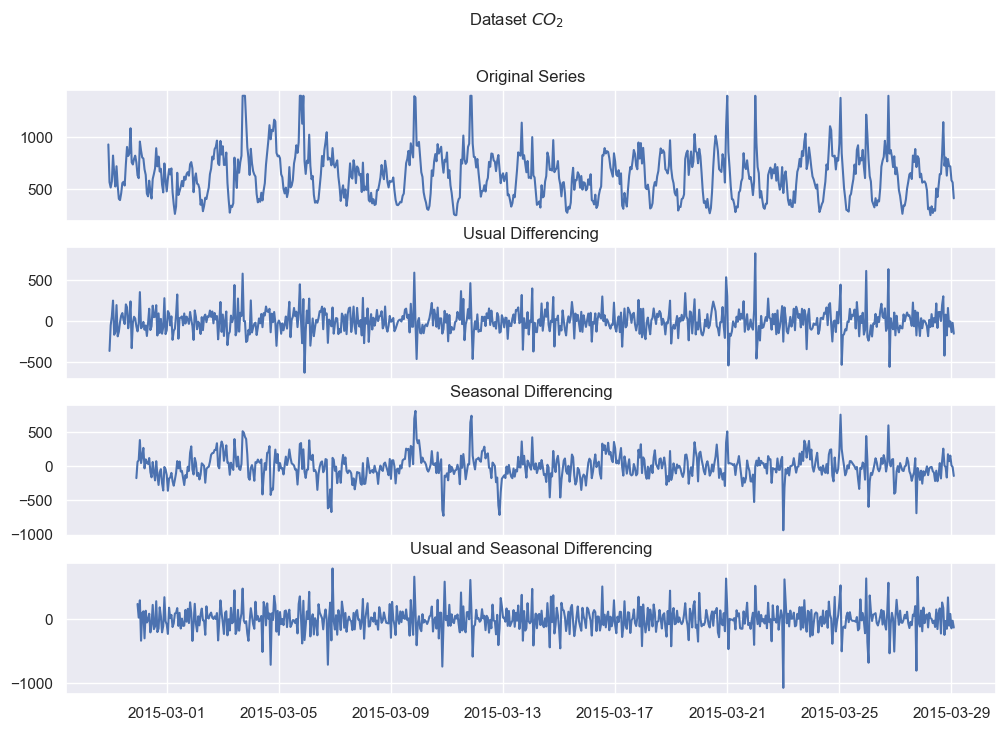

In [92]:
SEASON = 24

# Plot
fig, axes = plt.subplots(4, 1, figsize=(12,8), dpi=100, sharex=True)

# Original Series
axes[0].plot(y_train[:])
axes[0].set_title('Original Series')

# Usual Differencing
axes[1].plot(y_train[:].diff(1))
axes[1].set_title('Usual Differencing')

# Seasinal Differencing
axes[2].plot(y_train[:].diff(SEASON))
axes[2].set_title('Seasonal Differencing')

# Seasinal and Usual Differencing
axes[3].plot(y_train[:].diff(1).diff(SEASON))
axes[3].set_title('Usual and Seasonal Differencing')

plt.suptitle('Dataset $CO_2$', fontsize=12)
plt.show()

In [93]:
y_sdif = y_train[:].diff(1).diff(SEASON).dropna()
results = check_ADF(y_sdif);

ADF Statistic: -14.2574
p-value: 0.0000
Critical Values:
	1%: -3.4398, 
	5%: -2.8657, 
	10%: -2.5690, 
Result: The series is not stationary


После дифференцирования ряд остался нестационарным.

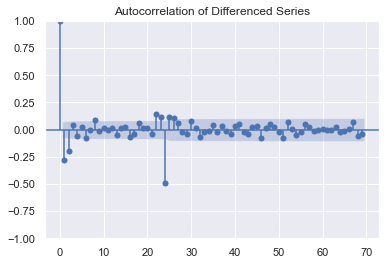

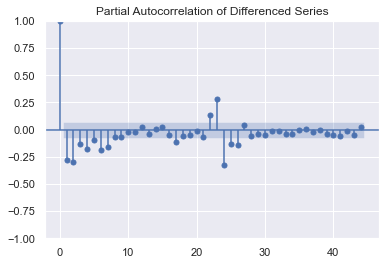

In [94]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

# Usual Differencing
plot_acf(y_sdif, title='Autocorrelation of Differenced Series', lags=np.arange(70) );plt.show()
# Usual Differencing
plot_pacf(y_sdif, title='Partial Autocorrelation of Differenced Series', method='ywm', lags=np.arange(45));plt.show()
plt.show();

Из графиков выше следует следующий выбор параметров.

7 порядка AR (7 лагов PACF ниже нуля и доверительного интервала);</br>
0 порядок MA (хотя 1 и 2 лаги ACF превысили доверительный интервал, при ручном подборе 0 даёт лучше результат);</br>
3 порядок SAR (на PACF 3 периода выше нуля);</br>
1 порядок SMA (на ACF значимый лаг ниже нуля).</br>

In [95]:
forecaster = SARIMAX(order= (7, 0, 0), seasonal_order=(3, 1, 0, SEASON))
forecaster.fit(y_train)
print(forecaster.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              value   No. Observations:                  725
Model:             SARIMAX(7, 0, 0)x(3, 1, 0, 24)   Log Likelihood               -4441.940
Date:                            Tue, 31 Oct 2023   AIC                           8907.881
Time:                                    12:43:23   BIC                           8962.511
Sample:                                02-26-2015   HQIC                          8928.997
                                     - 03-29-2015                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9305      5.801     -0.333      0.739     -13.300       9.439
ar.L1          0.4714      0.031   

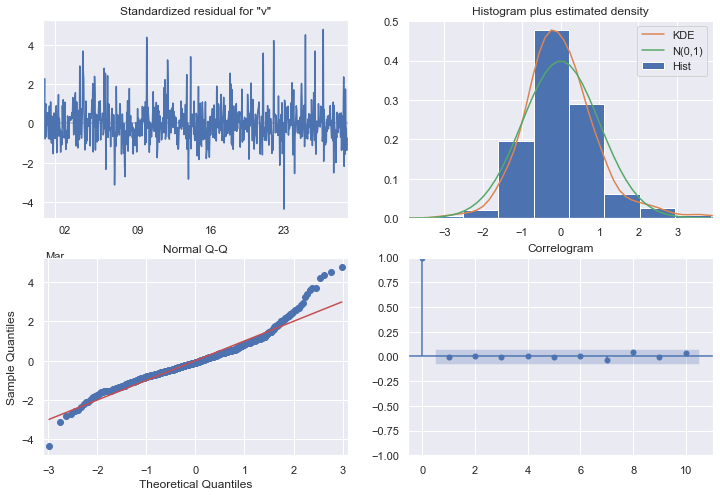

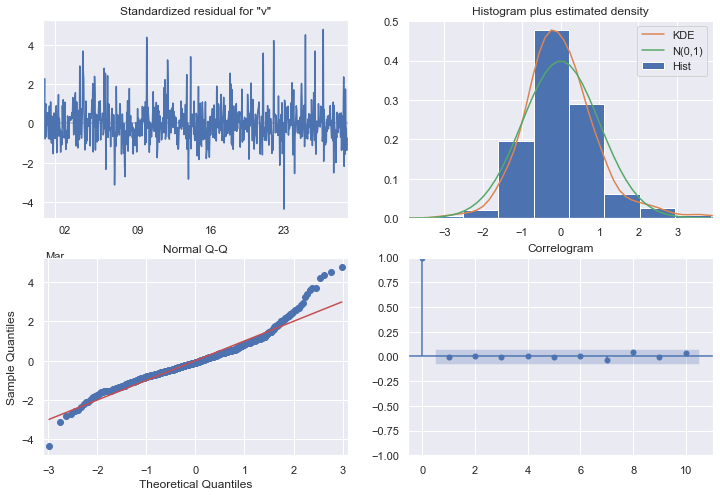

In [96]:
forecaster._fitted_forecaster.plot_diagnostics(figsize=(12,8))

sMAPE = 0.246


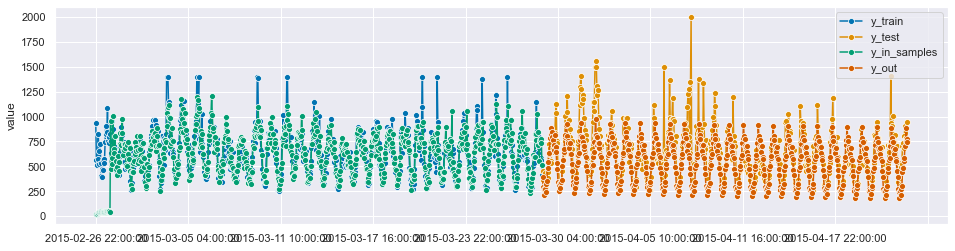

In [97]:
fhin = ForecastingHorizon(y_train.index[1:], is_relative=False)
y_in_samples = forecaster.predict(fhin)

y_out = forecaster.predict(fh)

plot_series(y_train, y_test, y_in_samples, y_out, labels=["y_train", "y_test", "y_in_samples", "y_out"])

print(f'sMAPE = {smape(y_out.values, y_test.values):.3f}')

In [98]:
model = AutoARIMA(start_p=1,  # начальный порядок AR
                  d=1,        # Порядок производной
                  start_q=0,  # начальный порядок MA
                  max_p=5,    # конечный порядок AR
                  max_q=5,    # конечный порядок MA                 
                  seasonal=True,  # Использовать SARIMA  
                  start_P=0,  # начальный порядок SAR
                  start_Q=0,  # начальный порядок SMA                 
                  D=1,        # Порядок сезонной производной
                  sp=24,      # Период сезонности
                  max_order = 5, # Максимальный порядок p+q+P+Q 
                  trace  = True,   # отчет он-лайн
                  stepwise = True, # метод ускоренного выбора параметров.
                  n_jobs = 1,      # для stepwise парралелизм не доступен.
                  error_action='ignore',  
                  suppress_warnings=True)

model.fit(y_train)

model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,1,0)[24] intercept   : AIC=9334.206, Time=0.46 sec
 ARIMA(0,1,0)(0,1,0)[24] intercept   : AIC=9389.496, Time=0.28 sec
 ARIMA(1,1,0)(1,1,0)[24] intercept   : AIC=9123.164, Time=6.34 sec
 ARIMA(0,1,1)(0,1,1)[24] intercept   : AIC=inf, Time=7.69 sec
 ARIMA(0,1,0)(0,1,0)[24]             : AIC=9387.497, Time=0.33 sec
 ARIMA(1,1,0)(2,1,0)[24] intercept   : AIC=9071.856, Time=18.05 sec
 ARIMA(1,1,0)(2,1,1)[24] intercept   : AIC=inf, Time=31.16 sec
 ARIMA(1,1,0)(1,1,1)[24] intercept   : AIC=inf, Time=10.91 sec
 ARIMA(0,1,0)(2,1,0)[24] intercept   : AIC=9137.631, Time=15.14 sec
 ARIMA(2,1,0)(2,1,0)[24] intercept   : AIC=9010.440, Time=23.37 sec
 ARIMA(2,1,0)(1,1,0)[24] intercept   : AIC=9064.335, Time=10.52 sec
 ARIMA(2,1,0)(2,1,1)[24] intercept   : AIC=inf, Time=46.79 sec
 ARIMA(2,1,0)(1,1,1)[24] intercept   : AIC=inf, Time=27.29 sec
 ARIMA(3,1,0)(2,1,0)[24] intercept   : AIC=9006.869, Time=28.00 sec
 ARIMA(3,1,0)(1,1,0)[24] intercept 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  725
Model:             SARIMAX(4, 1, 1)x(2, 1, [], 24)   Log Likelihood               -4463.668
Date:                             Tue, 31 Oct 2023   AIC                           8945.335
Time:                                     13:05:13   BIC                           8986.295
Sample:                                 02-26-2015   HQIC                          8961.169
                                      - 03-29-2015                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0315      0.330     -0.095      0.924      -0.679       0.616
ar.L1          0.4262      0.038     11.259      0.000       0.352       0.500
ar.L2         -0.0142      0.045     -0.312      0.755      -0.103       0.075
ar.L3          0.1378      0.045      3.085      0.002       0.050       0.225
ar.L4         -0.0529      0.042     -1.259      0.208      -0.135       0.029
ma.L1         -0.9439      0.022    -42.142      0.000      -0.988      -0.900
ar.S.L24      -0.6362      0.023    -27.118      0.000      -0.682      -0.590
ar.S.L48      -0.2726      0.029     -9.485      0.000      -0.329      -0.216
sigma2      1.993e+04    724.536     27.500      0.000    1.85e+04    2.13e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               313.26
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               1.24   Skew:                             0.55
Prob(H) (two-sided):                  0.10   Kurtosis:                         6.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

sMAPE = 1.572


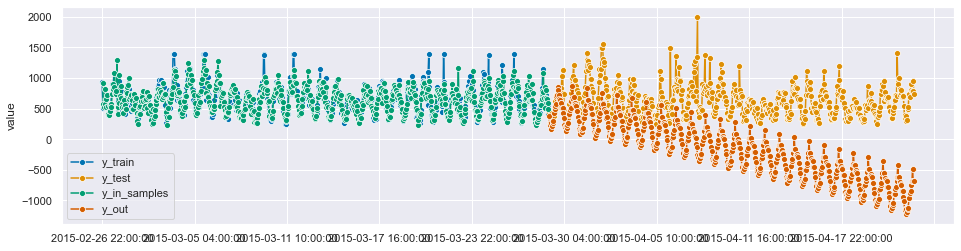

In [99]:
fhin = ForecastingHorizon(y_train.index[1:], is_relative=False)
y_in_samples = model.predict(fhin)

y_out = model.predict(fh)

plot_series(y_train, y_test, y_in_samples, y_out, labels=["y_train", "y_test", "y_in_samples", "y_out"])

print(f'sMAPE = {smape(y_out.values, y_test.values):.3f}')

Автоматический подбор параметров не дал удовлетворительного результата. 

<h2>4. Сравнение выбранных методов предсказаний и результатов работы настроенной модели SARIMA</h2>

По результатам исследования временного ряда были получены следующие показатели метрики sMAPE:</br>

NaiveForecaster при SEASON=24 - 0.195, </br>
NaiveForecaster при SEASON=24x7 - 0.176, </br>
ThetaForecaster при SEASON=24x7 - 0.180, </br>
ExponentialSmoothing при SEASON=24x7 - 0.176, </br>
TransformedTargetForecaster c ExponentialSmoothing - 0.173, </br>
SARIMAX при SEASON=24 - 0.246, </br>
AutoARIMA  при SEASON=24 - 1.572 </br>

Результаты SARIMAX хуже. Но из-за нехватки вычислительных мощностей не получилось провести расчёты при параметре SEASON=24x7, а также применить AutoARIMA c max_oder больше 5.</br></br>
Максимальной точности предсказания получилось достичь при использовании пайплайна, на котором был применён Deseasonalizer и для недельного цикла, и для суточного.